In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import misc
import scipy.constants as constants
from IPython.display import Latex
import matplotlib as mpl
#mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
#mpl.rcParams['text.usetex'] = True
import scipy.optimize as opt
import os
direc = os.getcwd()+"/M9/"
print(direc)

In [77]:
def load(name):
    data=np.loadtxt(name,dtype=np.str)
    return np.array(list(map(lambda xs: list(map(lambda x: np.float(x[2:-1].replace(",",".")),xs)),data)))

# calibration

(array([0.0330717]), array([[5.24193953e-09]]))


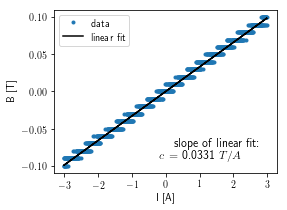

In [4]:
data_c=np.loadtxt(direc+"field_calib.dat")
m_c=sp.optimize.curve_fit(lambda x,m: x*m,data_c[:,0],data_c[:,1]*10)[0][0]
print(sp.optimize.curve_fit(lambda x,m: x*m,data_c[:,0],data_c[:,1]*10))
plt.figure(figsize=(4,3))
plt.plot(data_c[:,0],data_c[:,1]*10,".",label="data")
plt.plot(data_c[:,0],data_c[:,0]*m_c,"k",label=r"linear fit")
plt.text(-0.2,-0.09,r"\large slope of linear fit:\\$c\,=$ %.4f $T/A$"%(m_c))
plt.xlabel("I [A]")
plt.ylabel("B [T]")
plt.legend()
#plt.savefig(direc+"calibration.pdf",bbox_inches="tight",pad_inches=0.05)
plt.show()

theoretical prediction:

In [5]:
np.pi*10**(-2)

0.031415926535897934

# easy hard

0.2345 0.22399019607843143
-788.3764728033268 22846.232763791086
-47269.21847318883 44904.089054778844


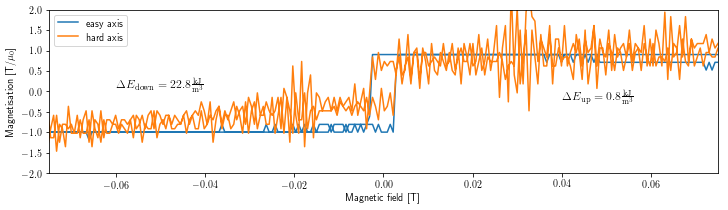

In [78]:
easy=np.loadtxt(direc+"angles_axes/175.dat")
#easy[:,0]=easy[:,0]*10
hard=np.loadtxt(direc+"angles_axes/220.dat")
#hard[:,0]=hard[:,0]*10
hard[:,0]=hard[:,0]*m_c; easy[:,0]=easy[:,0]*m_c

easy_max=0.2345#np.mean(easy[easy[:,0]>0.05,1])
easy_min=np.mean(easy[easy[:,0]<-0.05,1])
hard_max=np.mean(hard[hard[:,0]>0.075,1])
print(easy_max, easy_min)
hard_min=np.mean(hard[hard[:,0]<-0.075,1])

easy[:,1]=2*(easy[:,1]-(easy_max+easy_min)/2)/(easy_max-easy_min)
hard[:,1]=2*(hard[:,1]-(hard_max+hard_min)/2)/(hard_max-hard_min)

x=easy[:,0]
y=easy[:,1]
up=((x<np.roll(x,-1))&(y>0))
down=((x>np.roll(x,-1))&(y<0))
dEup=np.sum(easy[up,1]-hard[up,1])*(x[1]-x[0])/sp.constants.mu_0
dEdown=np.sum(easy[down,1]-hard[down,1])*(x[1]-x[0])/sp.constants.mu_0
print(dEup,dEdown)
dE=(dEup-dEdown)/2
print(dE*4,dEup+dEdown/2*4)

plt.figure(figsize=(12,3))
plt.xlim(-0.075, 0.075)
plt.ylim(-2, 2)
plt.plot(easy[:,0],easy[:,1],label="easy axis")
plt.plot(hard[:,0],hard[:,1],label="hard axis")
plt.text(0.04,-0.3,r"\large$\Delta E_\mathrm{up}=%.1f \frac{\mathrm{kJ}}{\mathrm{m}^3}$"%(-dEup/1000))
plt.text(-0.06,0.0,r"\large$\Delta E_\mathrm{down}=%.1f \frac{\mathrm{kJ}}{\mathrm{m}^3}$"%(dEdown/1000))
plt.xlabel("Magnetic field [T]")
plt.ylabel(r"Magnetisation [T/$\mu_0$]")
plt.legend()
#plt.savefig(direc+"easy_hard.pdf",bbox_inches="tight",pad_inches=0.05)
plt.show()

In [29]:
def load(name):
    data=np.loadtxt(name,dtype=np.str)
    return np.array(list(map(lambda xs: list(map(lambda x: np.float(x[0:].replace(",",".")),xs)),data)))

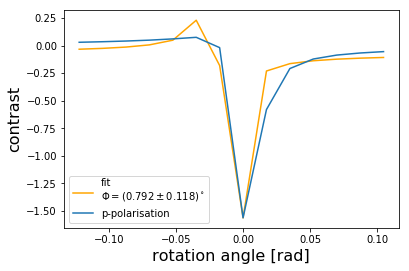

In [120]:
#contrast for cp files
angler=np.arange(-7,7,1)
#print(angler)
contrast=[]
fitl_array=[]
fitr_array=[]
#print(contrast)
diff=np.zeros(14)
mean=np.zeros(14)
yerrs=np.zeros(14)
angler = angler / 180 * np.pi

for i in np.arange(-7,7,1):
    data=load(direc+"cp_"+str(i)+"_moke.dat")
    left=data[data[:,0]<-0.5]
    right=data[data[:,0]>0.5]
    fitl=np.polyfit(left[:,0],left[:,1],1)
    fitl_array.append(fitl[1])
    fitr=np.polyfit(right[:,0],right[:,1],1)
    fitr_array.append(fitr[1])
#print(fitl_array)
#print(fitr_array)
for j in range(len(fitl_array)):
    contrast.append((fitl_array[j]-fitr_array[j])/((fitl_array[j]+fitr_array[j])/2))
#print(contrast)

func=lambda a,phi,theta,c,d: 4*(a+phi)*theta/((a+phi)**2+theta**2+c)+d
p0=[0.00719502, -0.00116948,  0.00142549,  0.]
fit_0=sp.optimize.curve_fit(func,angler,contrast,p0)
fit=fit_0[0]
perr = np.sqrt(np.diag(fit_0[1]))
kerr_angle = fit_0[0][0] * 180 / np.pi
kerr_err=perr[0]*180/np.pi

plt.plot(angler,func(angler,*fit), c='orange', label=f"fit\n$\Phi=({kerr_angle:.3f}\pm{kerr_err:.3f})^\circ$")
plt.plot(angler,contrast,label='p-polarisation')
plt.xlabel("rotation angle [rad]",fontsize=16)
plt.ylabel("contrast",fontsize=16)
plt.legend()
plt.savefig("contrast_p_polar_fit.pdf",bbox_inches="tight",pad_inches=0.05)

plt.show()

In [100]:
##checking contrast values are correct
data=load(direc+"cp_5_moke.dat")
#print(data[:,0])
left=data[data[:,0]<-0.5]
right=data[data[:,0]>0.5]
fitl=np.polyfit(left[:,0],left[:,1],1)
fitr=np.polyfit(right[:,0],right[:,1],1)
contrast=(fitl[1]-fitr[1])/((fitl[1]+fitr[1])/2)
print(contrast)

-0.06751903585431594


[[2.486 0.17 ]
 [2.466 0.17 ]
 [2.446 0.17 ]
 ...
 [2.446 0.169]
 [2.466 0.17 ]
 [2.486 0.17 ]]
[-0.00124607  0.18945504]
[-0.00134128  0.17291156]


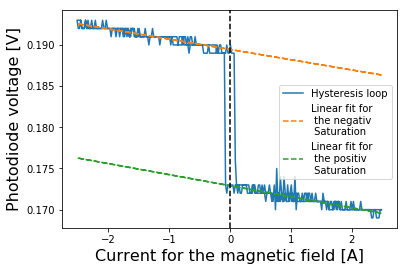

In [113]:
data=load(direc+"c_2_moke.dat")
print(data)
left=data[data[:,0]<-0.5]
right=data[data[:,0]>0.5]
fitl=np.polyfit(left[:,0],left[:,1],1)
fitr=np.polyfit(right[:,0],right[:,1],1)
print(fitl)
print(fitr)
plt.plot(data[:,0],data[:,1],label="Hysteresis loop")
plt.plot(data[:,0],data[:,0]*fitl[0]+fitl[1],label="Linear fit for\n the negativ\n Saturation",linestyle="--")
plt.plot(data[:,0],data[:,0]*fitr[0]+fitr[1],label="Linear fit for\n the positiv\n Saturation",linestyle="--")
plt.axvline(0,linestyle="--",color="k")
plt.legend(loc=5,bbox_to_anchor=(1,0.44))
plt.xlabel("Current for the magnetic field [A]",fontsize=16)
plt.ylabel("Photodiode voltage [V]",fontsize=16)
plt.savefig("exempl_saturation_fit.pdf",bbox_inches="tight",pad_inches=0.05)
plt.show()